$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°1 | Visualización y pre-procesamiento de datos}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Analisis exploratorio de datos**

In [2]:
df = pd.read_csv("cancer_challenge_cl2.csv",index_col=[0])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,-1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
df.shape #Numero de filas y columnas

(569, 31)

In [4]:
df.columns #Contenido de las columnas

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
#De los datos observardos anteriormente, verificamos quienes tienen datos nulos
df.isnull().any()
#Los resultados se obtendran con "True" si algun elemento iterable es nulo

mean radius                 True
mean texture               False
mean perimeter              True
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points         True
mean symmetry               True
mean fractal dimension      True
radius error                True
texture error              False
perimeter error            False
area error                 False
smoothness error            True
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error     True
worst radius               False
worst texture              False
worst perimeter             True
worst area                 False
worst smoothness            True
worst compactness          False
worst concavity             True
worst concave points        True
worst symmetry              True
worst fractal dimension     True
target    

In [6]:
#Realizamos una descripcion de la data
df.describe() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,567.000000,569.000000,564.000000,569.000000,569.000000,569.000000,569.000000,562.000000,566.000000,561.000000,...,569.000000,564.000000,569.000000,566.000000,569.000000,564.000000,565.000000,563.000000,562.000000,563.000000
mean,15.293573,19.434938,92.199947,650.421265,0.245386,0.104341,0.088799,0.191178,0.281227,0.142858,...,25.603146,107.377819,880.583128,0.132362,2.844961,0.273048,0.135599,0.290270,0.084044,0.632327
std,27.600997,5.445044,24.280344,359.317697,2.516184,0.052813,0.079720,3.372755,1.713647,1.897265,...,6.436019,33.722701,569.356993,0.022869,39.677091,0.209031,0.504349,0.062084,0.018120,0.518161
min,6.981000,9.710000,43.790000,-1001.000000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,-20.000000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.710000,16.170000,75.412500,418.700000,0.086370,0.064920,0.029560,0.020362,0.161925,0.057690,...,21.060000,84.102500,515.300000,0.116600,0.147700,0.115925,0.064130,0.250450,0.071827,0.000000
50%,13.400000,18.870000,86.545000,546.300000,0.095920,0.092630,0.061540,0.033600,0.179350,0.061480,...,25.410000,97.745000,686.500000,0.131300,0.215600,0.227450,0.099750,0.282300,0.080075,1.000000
75%,15.935000,21.810000,104.400000,782.600000,0.105400,0.130400,0.130700,0.074030,0.195700,0.066080,...,29.720000,126.000000,1084.000000,0.146000,0.341600,0.385300,0.162500,0.318150,0.092105,1.000000
max,666.000000,99.000000,188.500000,2501.000000,45.000000,0.345400,0.426800,80.000000,34.000000,45.000000,...,49.540000,251.200000,4254.000000,0.222600,666.000000,1.252000,12.000000,0.663800,0.207500,5.000000


Preprocesamiento

In [7]:
# Recorremos la informacion segun la categoria y caracteristicas numericas
for col in df.columns:
  print(col, ":",df[col].nunique()) #Numero de valores unicos en un columna

mean radius : 455
mean texture : 480
mean perimeter : 517
mean area : 539
mean smoothness : 475
mean compactness : 537
mean concavity : 537
mean concave points : 536
mean symmetry : 430
mean fractal dimension : 493
radius error : 535
texture error : 519
perimeter error : 533
area error : 528
smoothness error : 543
compactness error : 541
concavity error : 533
concave points error : 507
symmetry error : 498
fractal dimension error : 532
worst radius : 457
worst texture : 512
worst perimeter : 510
worst area : 544
worst smoothness : 409
worst compactness : 529
worst concavity : 534
worst concave points : 490
worst symmetry : 497
worst fractal dimension : 531
target : 3


In [8]:
df["target"].unique() #Unique values en la columna "target"

array([ 0.,  1.,  5., nan])

In [9]:
#Por lo anterior obsrevamos que existen valores nulos en nuestro array, para ello se purgará esos valores
df = df.dropna(subset=['target'])
df.shape
#Con lo anterior nos cercioramos de que hemos eliminado los valores nulos de nuestra columna "target"

(563, 31)

In [10]:
# Ahora debemos limitar los valores de nuestro array con 0 y 1 para indicar si hay o no existencia de cancer
df[df["target"]==5]=1 #Reemplazamos 5 con 1, donde 1 significa cancer y 0 no hay cancer.
df["target"].unique() #Confirma los valores correctos unicos de la columna "target"

array([0., 1.])

In [11]:
# Por lo anterior, se puede entender de que hayan valores nulos en nuestros datos
df.isnull().any().sum() 

13

In [12]:
#Por ende se observan que hay algunos datos en nuestro archivo que no tienen valores, por ende
#dificultarian el procesamiento de los mismos
df=df.dropna().reset_index(drop=True) #Por lo anterios, soltamois los valores nuelos y eliminamos la antigua indexacion y usamos una nueva.
df.isnull().any().sum() #Confirmamos que ya no hay valores nulos

0

**Visualizacion de datos**

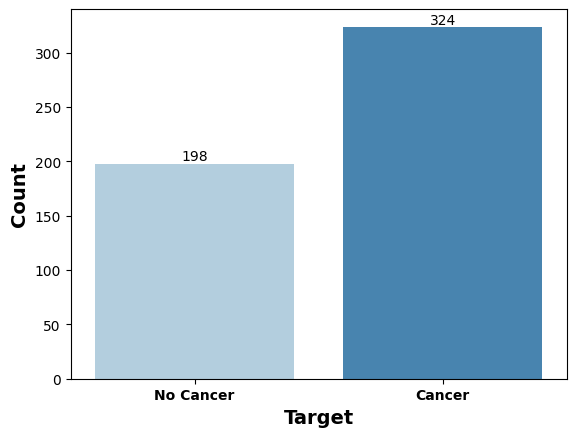

In [13]:
x = df.drop(["target"],axis=1) #Definimos nuestro eje x como las columnas diferentes a la columna "target"
y = df["target"] #y es el "target"
     

#Graficamos los valores target
sns.countplot(data=df, x='target', palette="Blues") #Mostramos la cantidad de observaciones hechas en cada categoria usando barras
plt.xlabel('Target', fontsize=14, weight='bold') #Parametros de x
plt.ylabel('Count', fontsize=14, weight='bold') #Parametros de y
plt.xticks(ticks=[0, 1], labels=['No Cancer', 'Cancer'], weight='bold') #Definimos entre 0 y 1 a las etiquetas de No Cancer y Cancer, respectivamente

# Añadimos anotaciones a cada barra con el numero exacto de casos
for bar in plt.gca().containers:
    label = [f"{int(h.get_height())}" for h in bar] 
    plt.bar_label(bar, labels=label, label_type='edge') 
#Finalmente mostramos los valores
plt.show() 

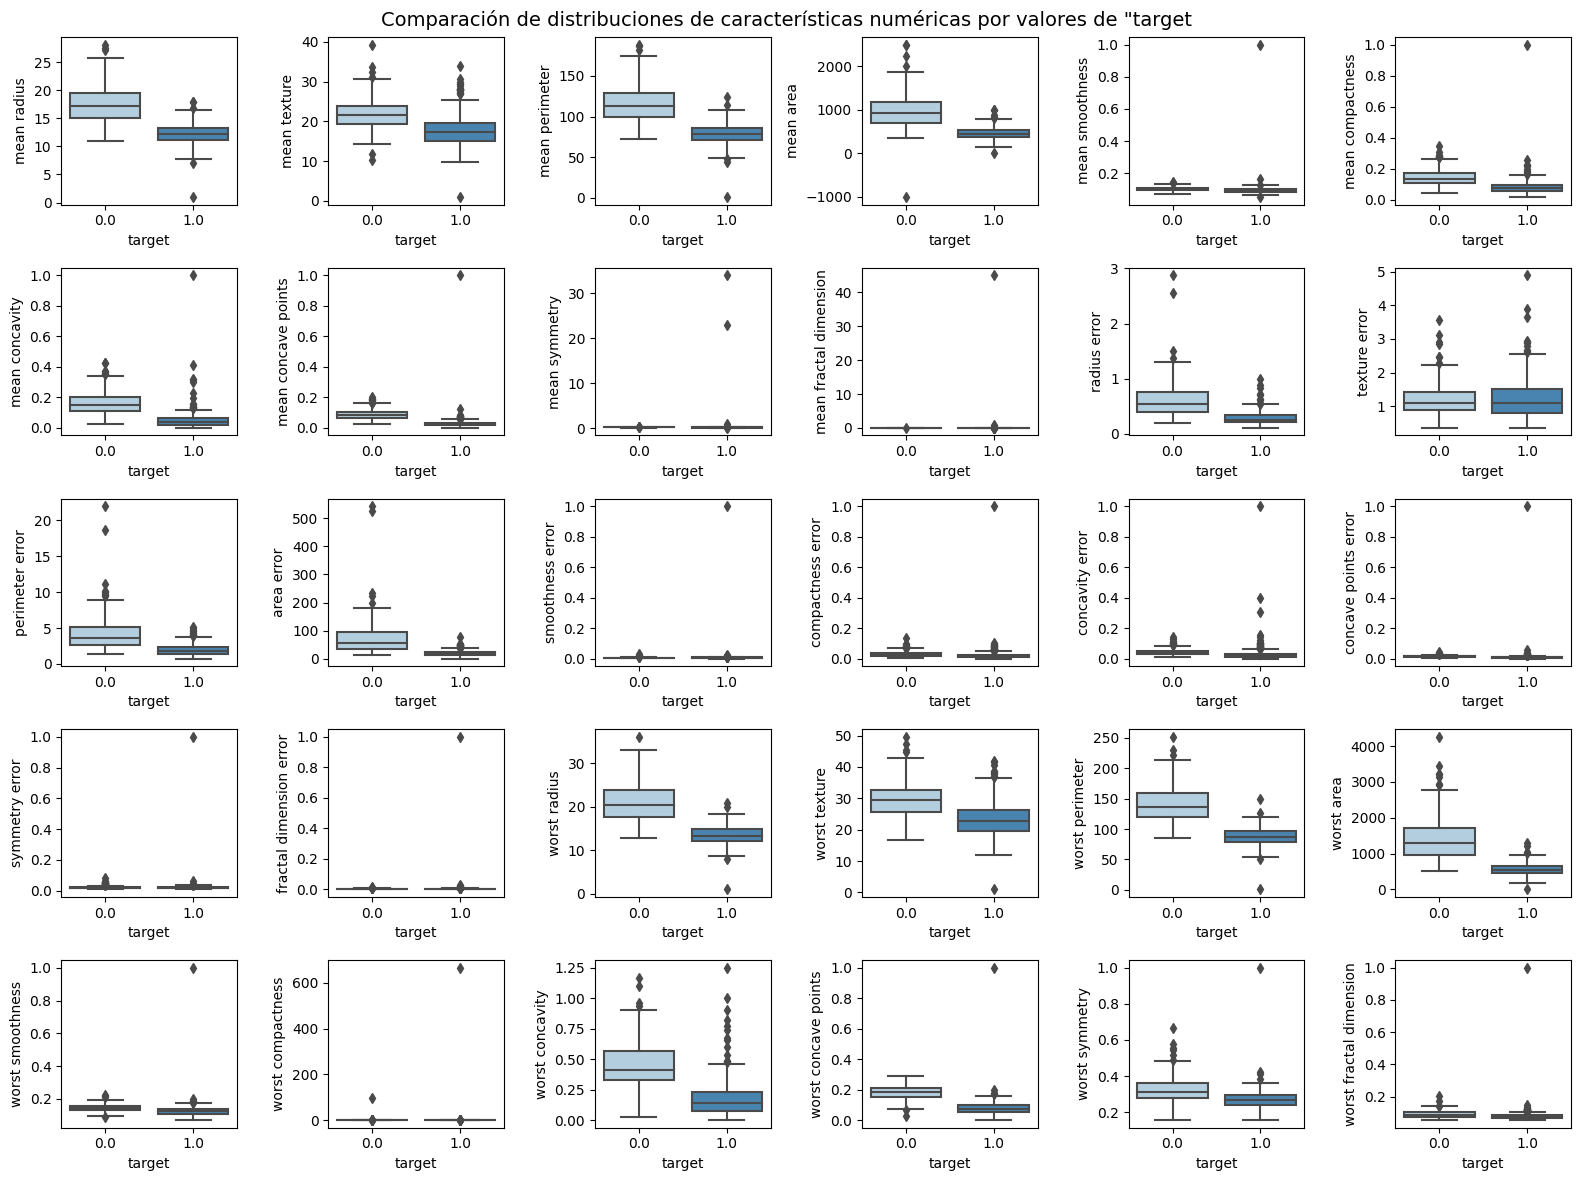

In [14]:
## Definimos la lista de características numéricas.
# Definimos el tamaño de la figura.
plt.figure(figsize=(16, 12))


plt.suptitle('Comparación de distribuciones de características numéricas por valores de "target', fontsize=14)

# Para desarrollar nuestros sub graficos, definiremos un subgrafico
for i,feature in enumerate(x.columns):
    ax = plt.subplot(5, 6, i+1) #Creamos una matriz de 5x6 para los 30 datos correspondientes al target
    sns.boxplot(x='target', y=feature, data=df, palette="Blues", ax=ax)
    ax.set_xlabel('target', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

# Ajustamos el diseño y ploteamos
plt.tight_layout() #Sin esta linea se ve todo ajustado y no se observa bien
plt.show()

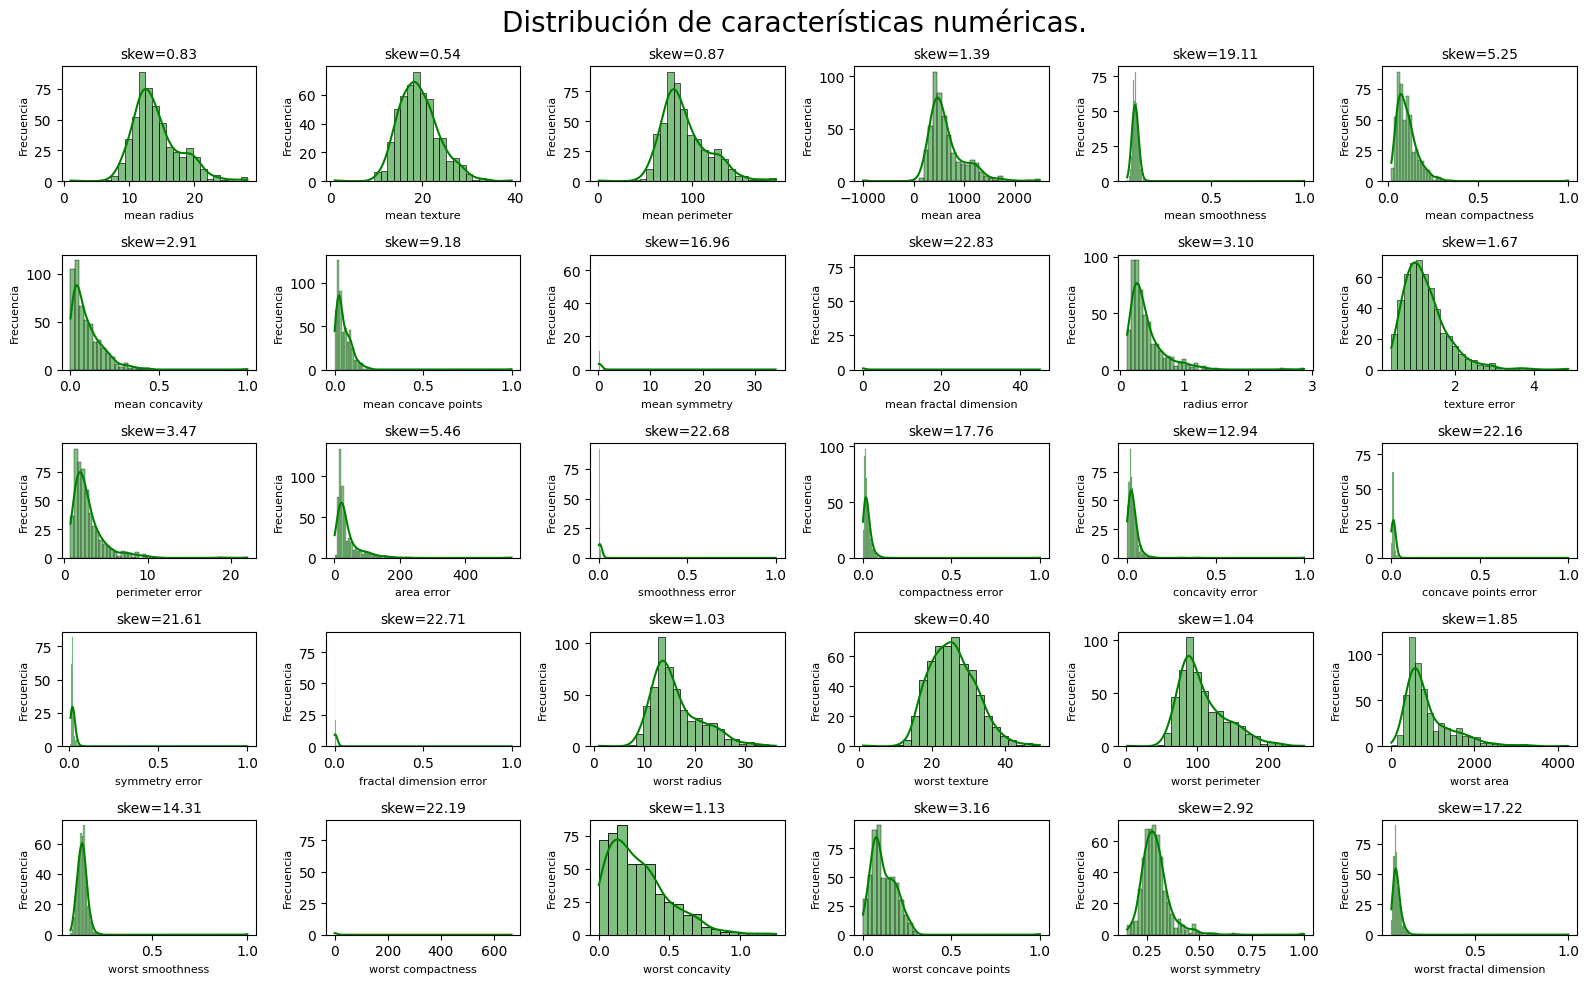

In [15]:
# Ahora buscaremos la caracteristicas de distribucion de los datos
plt.figure(figsize = (16, 10))
plt.suptitle('Distribución de características numéricas.', fontsize=20)

# Para desarrollar nuestros sub graficos, definiremos un subgrafico
for i,feature in enumerate(x.columns):
  ax = plt.subplot(5, 6, i+1)
  #A diferencia del inciso anterior debemos mostrar los valores de las columnas excluyendo a la columna "target"
  sns.histplot(df[feature], color='green', kde=True, ax=ax)
  #Ahora como característica adicional vamos a mostrar por cada grafico como varía la asimetría de los datos
  #Calculamos la asimetría de nuestros datos
  ax.set_title(f"skew={df[feature].skew():.2f}", fontsize=10) 
  #Mostramos los datos de cada columna en el grafico
  ax.set_xlabel(feature, fontsize=8)
  ax.set_ylabel('Frecuencia', fontsize=8)
    
# Ajustamos el diseño y ploteamos
plt.tight_layout() #Sin esta linea se ve todo ajustado y no se observa bien
plt.show()

#  Observando los graficos obtenido se puede concluir que se observa que la mayoría de las variables predictoras se distribuyen normalmente correspondiendo a la forma de la campana de Gauss

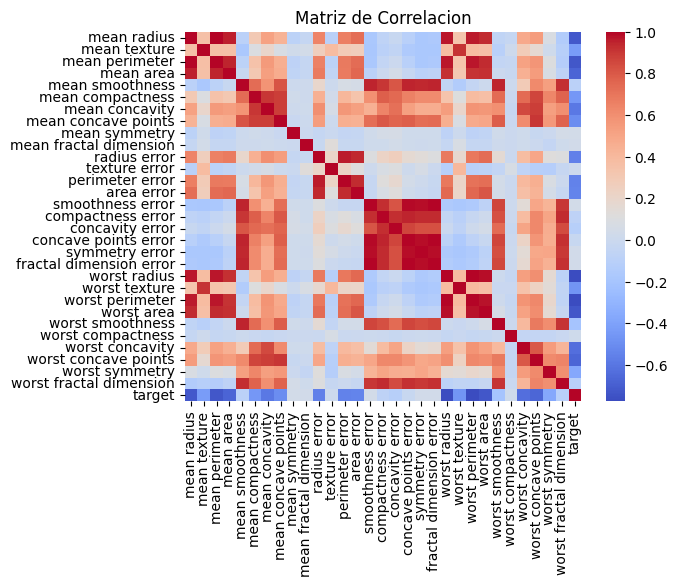

In [16]:
#Creamos la matriz de Correlacion 
#Primero debemos calcular la correlacion de los datos
corr = df.corr()
#Luego se configura la matriz de correlacion
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
#Mostramos el mapa
plt.title('Matriz de Correlacion')
plt.show()

In [17]:
#Ahora debemos normalizar nuestra data en valores de 0 a 1
normalized_x = (x-x.min())/(x.max()-x.min()) 
normalized_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.626706,0.245037,0.649600,0.000000,0.069424,0.263323,0.30010,0.14710,0.004010,0.000640,...,0.695776,0.336424,0.733813,0.474489,0.098005,0.000958,0.568610,0.2654,0.359929,0.067580
1,0.721874,0.438088,0.703467,0.664477,0.033894,0.060431,0.08690,0.07017,0.002219,0.000149,...,0.684646,0.461681,0.630695,0.459676,0.056663,0.000239,0.192971,0.1860,0.140486,0.035959
2,0.689414,0.528997,0.688000,0.629355,0.060135,0.143297,0.19740,0.12790,0.002977,0.000223,...,0.644121,0.505356,0.605516,0.401599,0.078841,0.000596,0.359744,0.2430,0.242798,0.034435
3,0.384360,0.506270,0.408427,0.396088,0.094863,0.269748,0.24140,0.10520,0.004535,0.001056,...,0.396975,0.525340,0.391167,0.133247,0.149252,0.001260,0.548642,0.2575,0.601423,0.124831
4,0.711546,0.348485,0.715200,0.656196,0.050318,0.115662,0.19800,0.10430,0.002210,0.000197,...,0.614726,0.322827,0.604317,0.370092,0.071305,0.000267,0.319489,0.1625,0.094724,0.023006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.758392,0.558777,0.752000,0.708167,0.061613,0.098428,0.24390,0.13890,0.001965,0.000139,...,0.697774,0.523280,0.659872,0.476370,0.075181,0.147112,0.328035,0.2216,0.058684,0.017048
518,0.705644,0.711860,0.694400,0.645917,0.047679,0.085680,0.14400,0.09791,0.002042,0.000119,...,0.647546,0.767408,0.615508,0.406772,0.048911,0.000248,0.256789,0.1628,0.119384,0.011990
519,0.575433,0.707419,0.572267,0.530868,0.033693,0.084559,0.09251,0.05302,0.001564,0.000145,...,0.513128,0.682324,0.502398,0.264049,0.046004,0.000424,0.271805,0.1418,0.077416,0.024509
520,0.722980,0.740073,0.741867,0.647059,0.068790,0.262711,0.35140,0.15200,0.003945,0.000449,...,0.706050,0.791512,0.733813,0.427933,0.101020,0.001263,0.749760,0.2650,0.298992,0.072977


**LazyPredict model test**

In [18]:
#Ahora utilizaremos LazyPredict para poder observar que modelo es mejor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 32.51it/s]

[LightGBM] [Info] Number of positive: 232, number of negative: 133
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3656
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635616 -> initscore=0.556388
[LightGBM] [Info] Start training from score 0.556388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.96,0.95,0.95,0.96,0.07
SVC,0.96,0.95,0.95,0.96,0.01
Perceptron,0.96,0.95,0.95,0.96,0.01
LinearSVC,0.95,0.94,0.94,0.95,0.01
KNeighborsClassifier,0.95,0.94,0.94,0.95,0.14
LogisticRegression,0.95,0.94,0.94,0.95,0.02
RandomForestClassifier,0.94,0.94,0.94,0.94,0.15
SGDClassifier,0.94,0.93,0.93,0.94,0.01
BaggingClassifier,0.94,0.93,0.93,0.94,0.06
